There are two ways to proceed: oversampling or undersampling.
First let's start with over-sampling, I will use SMOTE method.

First I need to divide the dataset into training and testing.

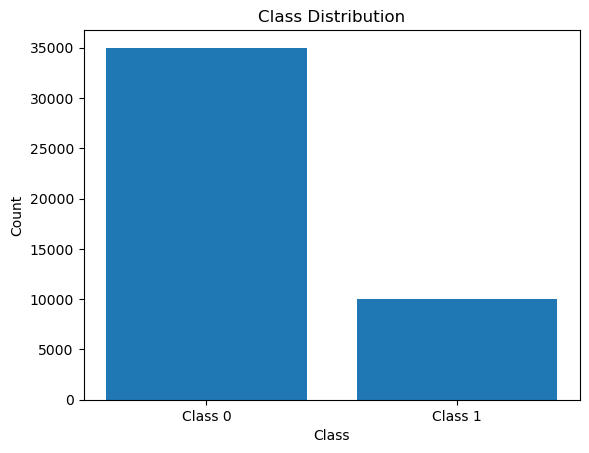

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/loan_data_all_numerical_no_outliers.csv')
x = df.drop(["loan_status"], axis=1)
y = df["loan_status"]

count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)


Distribution of test set:

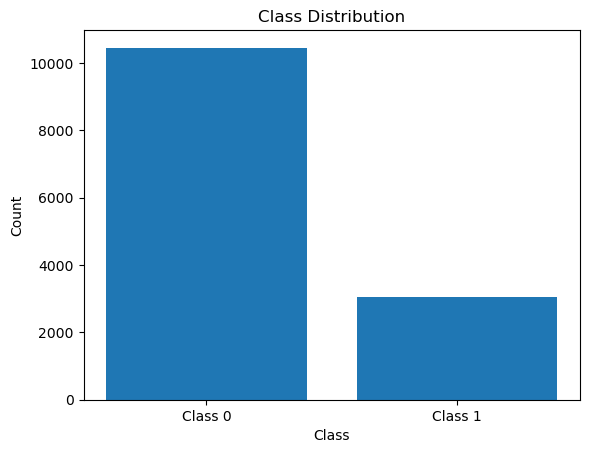

In [12]:
x_test = df_test.drop(["loan_status"], axis=1)
y_test = df_test["loan_status"]

count_class = y_test.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

df_test = df_test.drop(df_test.columns[0], axis=1)
df_test.to_csv("data/test_set.csv")

But the distribution of training set can't look like this, let's use SMOTE.

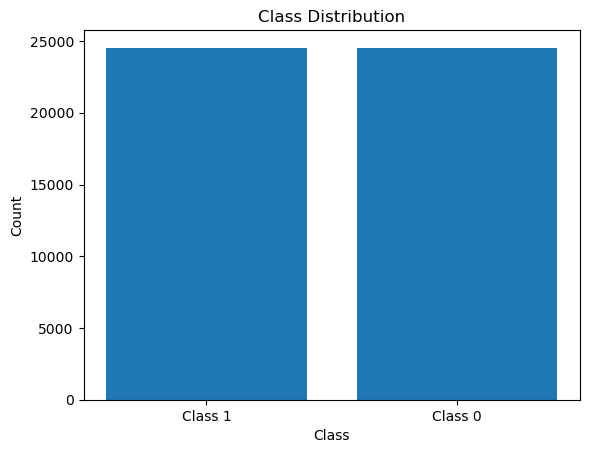

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
0,38.0,0,1,71350.0,0,21000.0,1,12.73,0.29,681,0,1
1,31.0,0,2,73026.0,0,25000.0,0,8.99,0.34,666,0,1
2,36.0,0,1,151123.0,0,18000.0,4,11.11,0.12,670,1,0
3,23.0,0,2,71709.0,0,4500.0,2,12.68,0.06,683,1,0
4,25.0,1,3,75541.0,0,20000.0,2,10.53,0.26,696,0,1


In [13]:
from imblearn.over_sampling import SMOTE

x_train = df_train.drop(["loan_status"], axis=1)
y_train = df_train["loan_status"]

# Initialize SMOTE
smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train, y_train)

count_class = y_train.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

x_train = x_train.drop(x_train.columns[0], axis=1)
y_train = pd.Series(y_train, name="loan_status")

# Merge x and y for train set
df_train = pd.concat([x_train, y_train], axis=1)

df_train.head()




In [14]:
df_test.to_csv("data/train_set.csv")